The purpose of this project is to use Machine Learning algorithms to predict lithographic Vp values

Vp can be defined as the ration of sismic ocmpressional and sheasr-wave velocities (Vp/V8)

Sedimentary rock lithology can be implemented to predict which type of rock has hyrdocarbons

Use the following well logs 19A, BT2, F1B, and SR, from the well logs use all possible combinations to train with 3 wells and predict Vp with 1 well, evaluate the performance with parameter optimization for the machine learnign algoritms:

* MLP (Machine Learning P)
* SVM (Support Vector Machine)
* Decision Tree
* Random Forest

Fromt he well log 19A we obtain the following data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#importing components
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#from sklearn.svm import SVR
from sklearn import preprocessing
#from sklearn.metrics import r2_score

#from mpl_toolkits.axes_grid1 import make_axes_locatable

#tensor flow
from keras import Sequential
from keras.layers import Dense, LSTM
#from keras.optimizers import SGD


### Analyze the data from the 4 wells: 19A, BT2, F1B, SR

In [ ]:
wells = ['19A', 'BT2', 'SR', 'F1B']
#wells = ['19A', 'BT2', 'F1B', 'F1B']
#wells = ['19A', 'BT2', 'F1B', 'F1B']
#wells = ['19A', 'BT2', 'F1B', 'F1B']

#well_path = '/content/'
well_path = '/content/sample_data/'
data_all = []
for well in wells:
  data_tmp = np.load(well_path + well + '.npy')
  data_all.append(data_tmp)
idx1 = 0 # 19A is used as the blind test
idx2 = 1 # BT2 is used as the blind test
N1 = len(data_all[idx1])
N2 = len(data_all[idx2])
print(N1,N2)
blind_ori = data_all[idx1]

data_merge =np.concatenate((data_all[0], data_all[1], data_all[2], data_all[3]), axis=0)  # Merge all well data together
print('The merged data shape is:', data_merge.shape)

data_nor = preprocessing.StandardScaler().fit(data_merge)
data_nor = data_nor.transform(data_merge)

print(data_nor.shape)

features = data_nor[N1:, 1:7]
label_norm = data_nor[N1:, 7]
print(features.shape, label_norm.shape )

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_norm, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#processing for blind data, make sure use the correct label data
X_blind = data_nor[0:N1, 1:7]
y_blind = data_nor[0:N1, 7]
X_train_well = data_nor[N1:N1+N2, 1:7]
y_train_well = data_nor[N1:N1+N2, 7]

#Processing for blind data for Wells.

#X_blind = data_merge[0:N1, 1:7]
#y_blind = data_merge[0:N1, 7]
#X_train_well = data_merge[N1:N1+N2, 1:7]
#y_train_well = data_merge[N1:N1+N2, 7]

#X_blind = scaled_features[0:N1, 1:7]
#y_blind = scaled_features[0:N1, 7]
#X_train_well = scaled_features[N1:N1+N2, 1:7]
#y_train_well = scaled_features[N1:N1+N2, 7]

1930 4057
The merged data shape is: (9894, 10)
(9894, 10)
(7964, 6) (7964,)
(6769, 6) (1195, 6) (6769,) (1195,)


### The merged data shape is:
[9894, 10]
[7964, 6]
[6769, 6]
[1195, 6]

In [ ]:
print(X_blind.shape, X_train_well.shape, y_train_well.shape, y_blind.shape)

(1930, 6) (4057, 6) (4057,) (1930,)


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR
estimator = svm.SVR(kernel='rbf', C=1000.0, epsilon = 0.0001, gamma = 0.0001 )
estimator = svm.SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=10.)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
y_blind_pred = estimator.predict(X_blind)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

-4447.682482801003

In [ ]:
blind_real = y_blind
blind_pred = y_blind_pred

In [ ]:
min(label_norm)

-2.3041850719086074

In [ ]:
min(y_blind)

-2.4222906115525062

In [ ]:
min(blind_real)

-2.4222906115525062

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_blind, y_blind_pred)

0.0020435830913887454

3498.9326 4085.844


(-3.0, 3.0)

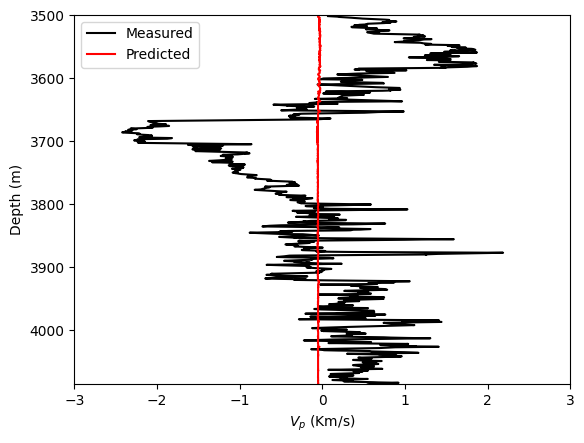

In [ ]:
ztop = np.min(data_merge[0:N1, 0]) - 2.0
zbot = np.max(data_merge[0:N1, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(-3, 3)

3168.0725 4085.844


(-3.0, 3.0)

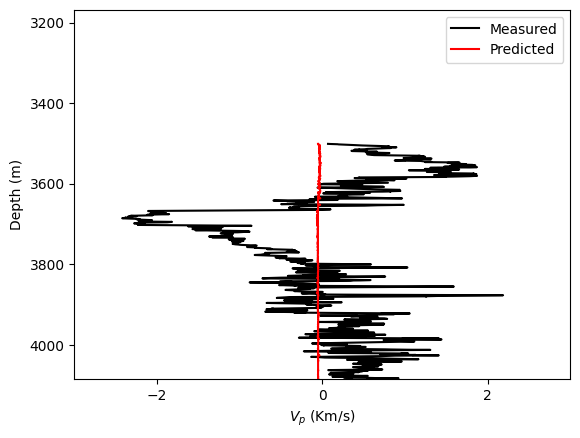

In [ ]:
ztop = np.min(data_merge[0:N2, 0]) - 2.0
zbot = np.max(data_merge[0:N2, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(-3, 3)

In [ ]:
##import csv
#df = pd.DataFrame(X_train)
# saving the dataframe
#df.to_csv('X_train.csv')

In [ ]:
#df1 = pd.DataFrame(y_train)
# saving the dataframe
#df1.to_csv('y_train.csv')

# Random Forest



In [ ]:
estimator = RandomForestRegressor(max_depth=6, min_samples_split=5, bootstrap=True, min_samples_leaf=1,
                                  max_features='sqrt', n_estimators=2000)

estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
y_blind_pred = estimator.predict(X_blind)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.9141136344987414

In [ ]:
from sklearn.metrics import r2_score
BlindR2Value = r2_score(y_blind, y_blind_pred)
print("Training Set R-Square=", BlindR2Value)

Training Set R-Square= 0.8551372165250359


In [ ]:
blind_real = y_blind
blind_pred = y_blind_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_blind, y_blind_pred)

0.8551372165250359

3498.9326 4085.844


(1.5, 6.0)

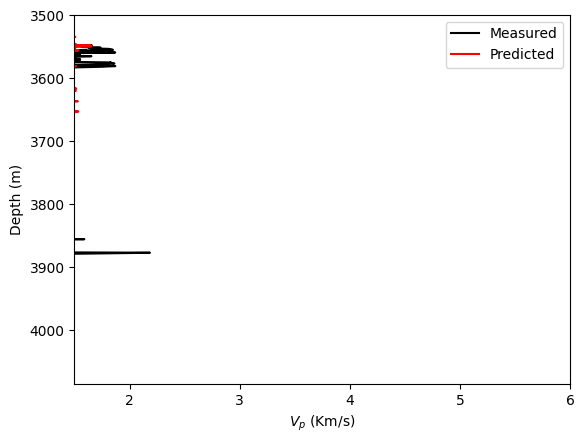

In [ ]:
ztop = np.min(data_merge[0:N1, 0]) - 2.0
zbot = np.max(data_merge[0:N1, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(1.5, 6)

# Decision Tree

In [ ]:
for integer

SyntaxError: ignored

# Multi-Layer Perceptron

# Discussion

By looking at the 4 different algorithms we can observe that...